In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, confusion_matrix,  r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
## Onehot encoding--- ColumnTrnasformer

from sklearn.compose import ColumnTransformer
import sys

In [43]:
ds = load_iris()

In [44]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
x = ds['data']

In [46]:
y = ds['target']

In [47]:
svc = SVC(kernel='linear', C=1, random_state=45)

In [48]:
svc.fit(x, y)

SVC(C=1, kernel='linear', random_state=45)

In [49]:
svc.predict([x[149]])

array([2])

In [50]:
rbf_svc = SVC(kernel='rbf', gamma=5, C=2, random_state=450)

In [51]:
rbf_svc.fit(x, y)

SVC(C=2, gamma=5, random_state=450)

In [52]:
rbf_svc.predict([x[66]])

array([1])

### Linear SVC by basic Dataset

In [53]:
X_new, Y_new = make_classification(n_samples=1000, n_features= 2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [54]:
X_new

array([[-2.41432233, -1.95611058],
       [ 0.46833807, -2.65296079],
       [ 0.47920144, -1.29720993],
       ...,
       [ 0.98474683,  1.13722261],
       [-2.63565967,  2.13045387],
       [-1.80499357,  1.66378593]], shape=(1000, 2))

In [55]:
Y_new

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [56]:
r = pd.DataFrame(X_new)[0]
r

0     -2.414322
1      0.468338
2      0.479201
3     -0.895180
4     -0.008473
         ...   
995   -1.213111
996   -0.042805
997    0.984747
998   -2.635660
999   -1.804994
Name: 0, Length: 1000, dtype: float64

In [57]:
d = pd.DataFrame(X_new)[1]
d

0     -1.956111
1     -2.652961
2     -1.297210
3     -0.226284
4     -0.338787
         ...   
995    1.488431
996   -0.912856
997    1.137223
998    2.130454
999    1.663786
Name: 1, Length: 1000, dtype: float64

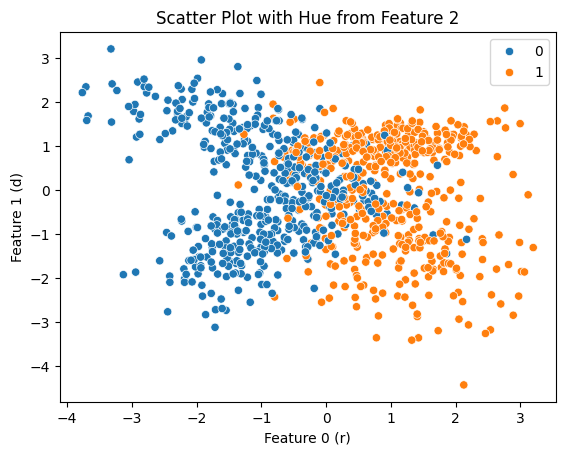

In [58]:
sns.scatterplot(x=r, y=d, hue=Y_new)
plt.xlabel("Feature 0 (r)")
plt.ylabel("Feature 1 (d)")
plt.title("Scatter Plot with Hue from Feature 2")
plt.show()

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X_new,Y_new,test_size=0.25,random_state=10)

In [60]:
svc = SVC(kernel='linear')

In [61]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [62]:
svc.coef_

array([[1.68938589, 0.09465696]])

In [63]:
y_pred1 = svc.predict(X_test)

In [64]:
classification_report1 = classification_report(y_test, y_pred1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       112
           1       0.89      0.92      0.91       138

    accuracy                           0.90       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.90      0.90       250



In [65]:
rbf_svc1 = SVC(kernel='rbf')

In [66]:
rbf_svc1.fit(X_train, y_train)

SVC()

In [67]:
rbf_svc1.coef0, rbf_svc1.intercept_

(0.0, array([0.10776255]))

In [68]:
y_pred2 = rbf_svc1.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred2))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       112
           1       0.93      0.93      0.93       138

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [70]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,y_train)
## Prediction
y_pred3=polynomial.predict(X_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       112
           1       0.95      0.85      0.90       138

    accuracy                           0.89       250
   macro avg       0.89      0.90      0.89       250
weighted avg       0.90      0.89      0.89       250

[[106   6]
 [ 21 117]]


In [71]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
## Prediction
y_pred4=sigmoid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73       112
           1       0.80      0.71      0.75       138

    accuracy                           0.74       250
   macro avg       0.75      0.75      0.74       250
weighted avg       0.75      0.74      0.74       250

[[88 24]
 [40 98]]


In [72]:
sigmoid.intercept_

array([-0.73154869])

#### Hyperparametere Tuning With SVC

In [73]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [74]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [75]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.813 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.813 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.853 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.520 total time=   0.0s
[CV 2/5] END ....C=0.1, gamm

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [76]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [77]:
## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       112
           1       0.90      0.92      0.91       138

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[ 98  14]
 [ 11 127]]


## Support Vector Regression Implementation

In [78]:
## Dataset (Tips Dataset)
import seaborn as sns
df=sns.load_dataset('tips')

In [79]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [81]:
df['sex'].value_counts(), df['smoker'].value_counts(), df['day'].value_counts(), df['time'].value_counts()

(sex
 Male      157
 Female     87
 Name: count, dtype: int64,
 smoker
 No     151
 Yes     93
 Name: count, dtype: int64,
 day
 Sat     87
 Sun     76
 Thur    62
 Fri     19
 Name: count, dtype: int64,
 time
 Dinner    176
 Lunch      68
 Name: count, dtype: int64)

In [82]:
## independnent and dependent features
X=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

In [83]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [84]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,Male,Yes,Sat,Dinner,2
1,1.66,Male,No,Sun,Dinner,3
2,3.50,Male,No,Sun,Dinner,3
68,2.01,Male,No,Sat,Dinner,2
184,3.00,Male,Yes,Sun,Dinner,2


## Feature Encoding(LAbel Encoding And Onehot Encoding)

In [86]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [87]:
X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

X_test.head()

,tip,sex,smoker,day,time,size
162,2.00,0,0,Sun,0,3
60,3.21,1,1,Sat,0,2
61,2.00,1,1,Sat,0,2
63,3.76,1,1,Sat,0,4
69,2.09,1,1,Sat,0,2


In [90]:
ct=ColumnTransformer(transformers=[('onehot',OneHotEncoder(drop='first'),[3])],
                                   remainder='passthrough')

np.set_printoptions(threshold=sys.maxsize)
X_train=ct.fit_transform(X_train)

X_test=ct.transform(X_test)

X_test

array([[0.  , 1.  , 0.  , 2.  , 0.  , 0.  , 0.  , 3.  ],
       [1.  , 0.  , 0.  , 3.21, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.  , 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.76, 1.  , 1.  , 0.  , 4.  ],
       [1.  , 0.  , 0.  , 2.09, 1.  , 1.  , 0.  , 2.  ],
       [0.  , 0.  , 1.  , 5.  , 1.  , 1.  , 1.  , 2.  ],
       [0.  , 1.  , 0.  , 3.51, 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 5.16, 1.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 5.  , 1.  , 0.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 3.6 , 1.  , 0.  , 0.  , 3.  ],
       [0.  , 1.  , 0.  , 5.65, 1.  , 1.  , 0.  , 2.  ],
       [1.  , 0.  , 0.  , 2.5 , 0.  , 1.  , 0.  , 3.  ],
       [0.  , 0.  , 1.  , 1.44, 1.  , 0.  , 1.  , 2.  ],
       [1.  , 0.  , 0.  , 3.09, 0.  , 1.  , 0.  , 4.  ],
       [0.  , 1.  , 0.  , 2.  , 1.  , 0.  , 0.  , 4.  ],
       [0.  , 0.  , 1.  , 1.36, 0.  , 0.  , 1.  , 3.  ],
       [0.  , 0.  , 1.  , 2.  , 0.  , 0.  , 1.  , 2.  ],
       [0.  , 0.  , 1.  , 1.68,

In [93]:
svr=SVR()

In [94]:
svr.fit(X_train,y_train)

y_pred=svr.predict(X_test)

In [95]:

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.46028114561159283
4.1486423210190235


## Hyperparameter Tuning using GridSearch CV

In [96]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [97]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [100]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [98]:
grid_prediction=grid.predict(X_test)

In [99]:
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.5081618245078687
3.8685147526100234
